# Pixel link Demo

In [1]:
import matplotlib.pyplot as plt
import pixellink
plt.rcParams['figure.figsize'] = (12, 8)

/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
util/plt.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", li

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
(768, 768)
train/ic17_whole/model.ckpt-200000
INFO:tensorflow:Restoring parameters from train/ic17_whole/model.ckpt-200000
('train/ic17_whole/model.ckpt-200000', 'Restore Success!')


In [2]:
# 载入图片
pl = pixellink.pixelLinkDetector("/Users/luoweimeng/Code/data/test/40.jpg")

In [3]:
# 输出bounding boxes, (x1, y1, x2, y2, x3, y3, x4, y4) 顺时针方向
pl.detect()

0.7
0.8


[array([244, 427, 363, 427, 244, 490, 363, 490]),
 array([152, 432, 227, 432, 152, 463, 227, 463]),
 array([371, 438, 614, 438, 371, 490, 614, 490]),
 array([379, 502, 618, 502, 379, 527, 618, 527]),
 array([143, 507, 258, 507, 143, 527, 258, 527]),
 array([212, 544, 583, 544, 212, 586, 583, 586]),
 array([212, 597, 582, 597, 212, 628, 582, 628]),
 array([524, 699, 707, 699, 524, 735, 707, 735]),
 array([468, 726, 495, 726, 468, 869, 495, 869])]

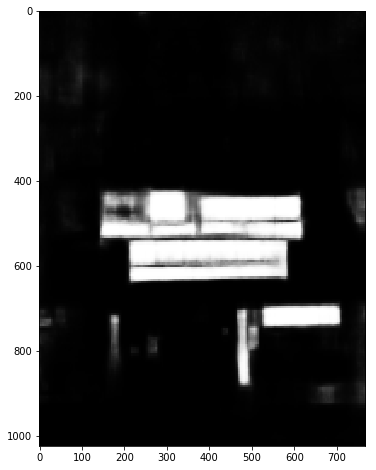

In [10]:
# 输出pixel score
pixel_score = pl.draw_pixel_score()
plt.imshow(pixel_score, cmap='gray')

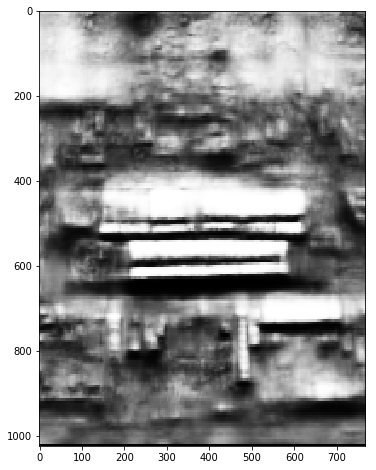

In [11]:
# 输出link score 0:左上 1:上 2:右上 3:左 4:右 5:左下 6:下 7:右下
link_score = pl.draw_link_score(6)
plt.imshow(link_score, cmap='gray')

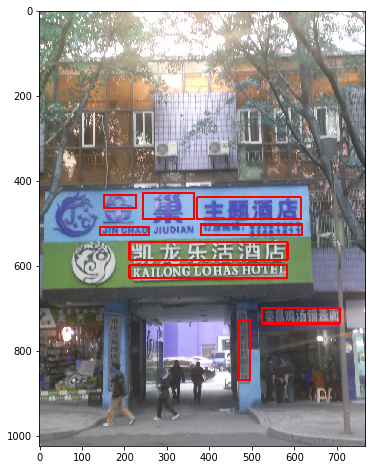

In [12]:
# 在原图上画出bounding boxes
plt.imshow(pl.draw_bbox())

In [13]:
pl.draw_bbox().shape

(1024, 768, 3)

In [14]:
pl.draw_pixel_score().shape

(1024, 768)

In [1]:
import numpy as np

In [8]:
bbox = np.array([244, 490, 244, 427, 363, 427, 363, 490])

In [9]:
bbox = bbox.reshape(4, 2)

In [10]:
bbox

array([[244, 490],
       [244, 427],
       [363, 427],
       [363, 490]])

In [14]:
                upper_left = np.argmin(map(lambda x: x[0] + x[1], bbox))
                upper_right = (upper_left + 1) % 4
                down_left = (upper_left + 3) % 4
                down_right = (upper_left + 2) % 4

In [18]:
bbox[[upper_left, upper_right, down_left, down_right]].reshape(-1)

array([244, 427, 363, 427, 244, 490, 363, 490])

In [16]:
bbox

array([[244, 490],
       [244, 427],
       [363, 427],
       [363, 490]])